In [2]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv


In [3]:
load_dotenv()

DB_STRING = f"postgresql://{os.getenv('USER_DB')}:{os.getenv('PASSWORD')}@{os.getenv('HOST')}:{os.getenv('PORT')}/{os.getenv('DATABASE')}"
db = create_engine(DB_STRING)
#import the data to a pandas dataframe
query_string = """
    SELECT kchd.*, kchs.date, kchs.price
    FROM eda.king_county_house_details kchd
    LEFT JOIN eda.king_county_house_sales kchs
    ON kchd.id = kchs.house_id
"""
df_sqlalchemy = pd.read_sql(query_string, db)

df_sqlalchemy.head()
#export the data to a csv-file
df_sqlalchemy.to_csv('data/eda.csv',index=False)
#import the data from a csv-file
df_import = pd.read_csv('data/eda.csv')
df_import

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0


In [4]:
conditions_df = df_import.query('bathrooms >=4 and waterfront == 0 and yr_built < 1975').copy()
conditions_df.loc[:,'sqft_outside'] = conditions_df['sqft_lot'] - conditions_df['sqft_living'] - conditions_df['sqft_basement'].fillna(0) #or ignore the one row with na?
conditions_df


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside
779,1954700695,5.0,4.25,4860.0,9453.0,1.5,0.0,1.0,5,10,...,1905,0.0,98112,47.6196,-122.286,3150.0,8557.0,2014-06-12,2250000.0,2833.0
1985,1118002090,3.0,4.25,2820.0,7200.0,2.0,0.0,0.0,4,10,...,1930,0.0,98112,47.6298,-122.290,3300.0,7522.0,2014-06-28,1600000.0,4020.0
2038,9471200200,4.0,4.25,5040.0,16048.0,1.0,0.0,3.0,3,10,...,1950,NaN,98105,47.6702,-122.260,3960.0,14000.0,2015-03-25,2530000.0,9388.0
2650,7611200136,4.0,4.00,3770.0,9750.0,1.0,0.0,0.0,4,9,...,1967,NaN,98177,47.7159,-122.367,2260.0,9878.0,2014-07-23,872000.0,4150.0
3018,3377900195,4.0,5.50,6930.0,45100.0,1.0,0.0,0.0,4,11,...,1950,19910.0,98006,47.5547,-122.144,2560.0,37766.0,2014-09-29,2530000.0,38170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18711,239000155,5.0,4.50,3540.0,21217.0,2.0,0.0,0.0,4,8,...,1926,0.0,98188,47.4274,-122.280,1290.0,12040.0,2015-01-05,707000.0,17077.0
19093,2025059131,4.0,4.25,3250.0,11780.0,2.0,0.0,0.0,3,8,...,1944,20010.0,98004,47.6322,-122.203,1800.0,9000.0,2014-09-04,980000.0,7640.0
19261,2397100705,4.0,4.25,3650.0,5328.0,1.5,0.0,0.0,3,9,...,1907,20140.0,98119,47.6380,-122.362,1710.0,3600.0,2014-07-14,1520000.0,358.0
19312,2771604190,7.0,4.25,3670.0,4000.0,2.0,0.0,1.0,3,8,...,1964,0.0,98199,47.6375,-122.388,2010.0,4000.0,2014-06-17,824000.0,-540.0


In [5]:
space_for_court_and_pool = 4800 + 800 #tennis court 30x15m recommended - about 4800, residential pool 800sqft, olympic pool 13.123sqft
df_outside = conditions_df[conditions_df['sqft_outside'] > space_for_court_and_pool + 400].copy() #buffer space outside
df_outside['sqft_outside_left_after_cond'] = df_outside['sqft_outside'] - (space_for_court_and_pool + 400) #+ buffer

#df_outside['sqft_outside_left_after_cond'].sort_values(ascending=False) #this will only get that one column
df_outside = df_outside.sort_values(by= 'sqft_outside_left_after_cond', ascending=False)
df_possible_houses = df_outside
df_possible_houses

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond
15152,3304700130,4.0,4.00,3860.0,67953.0,2.0,0.0,2.0,4,12,...,0.0,98177,47.7469,-122.378,4410.0,128066.0,2015-01-28,1760000.0,64093.0,58093.0
3314,2821049048,4.0,4.25,2360.0,57514.0,2.0,0.0,0.0,4,8,...,NaN,98003,47.2843,-122.294,2037.0,35733.0,2014-06-03,590000.0,55154.0,49154.0
14542,2303900035,5.0,6.25,8670.0,64033.0,2.0,0.0,4.0,3,13,...,NaN,98177,47.7295,-122.372,4140.0,81021.0,2014-06-11,2890000.0,52813.0,46813.0
3018,3377900195,4.0,5.50,6930.0,45100.0,1.0,0.0,0.0,4,11,...,19910.0,98006,47.5547,-122.144,2560.0,37766.0,2014-09-29,2530000.0,38170.0,32170.0
5961,5249800010,4.0,4.25,6410.0,43838.0,2.5,0.0,2.0,4,12,...,0.0,98144,47.5703,-122.280,2270.0,6630.0,2014-12-03,2730000.0,36628.0,30628.0
19445,722059020,6.0,4.50,4520.0,40164.0,2.0,0.0,0.0,3,9,...,20080.0,98031,47.4070,-122.216,2870.0,13068.0,2015-03-18,550000.0,34704.0,28704.0
4020,9175600025,7.0,6.75,7480.0,41664.0,2.0,0.0,2.0,3,11,...,NaN,98166,47.4643,-122.368,2810.0,33190.0,2014-10-07,800000.0,31784.0,25784.0
8507,3425059141,7.0,4.00,3150.0,34830.0,1.0,0.0,0.0,3,9,...,20050.0,98007,47.6029,-122.147,2390.0,12054.0,2014-05-28,999000.0,31680.0,25680.0
14172,1333300145,3.0,4.00,4200.0,30120.0,2.0,0.0,2.0,4,11,...,0.0,98112,47.6379,-122.311,2760.0,12200.0,2015-03-04,2230000.0,25320.0,19320.0
17665,3585901085,6.0,4.50,3810.0,28176.0,1.0,0.0,4.0,5,10,...,0.0,98177,47.7612,-122.381,3810.0,26400.0,2014-06-04,2010000.0,24366.0,18366.0


In [6]:
olympic_pool = 4800 + 13500 #tennis court 30x15m recommended - about 4800, residential pool 800sqft, olympic pool 13.123sqft
#df_olympic_outside = df_outside
df_olympic_outside = conditions_df[conditions_df['sqft_outside'] > olympic_pool + 400].copy() #buffer space outside
df_olympic_outside['sqft_outside_left_after_cond'] = df_olympic_outside['sqft_outside'] - (olympic_pool + 400) #+ buffer

#df_outside['sqft_outside_left_after_cond'].sort_values(ascending=False) #this will only get that one column
df_olympic_outside = df_olympic_outside.sort_values(by= 'sqft_outside_left_after_cond', ascending=False)
df_possible_olympic_houses = df_olympic_outside
df_possible_olympic_houses

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond
15152,3304700130,4.0,4.00,3860.0,67953.0,2.0,0.0,2.0,4,12,...,0.0,98177,47.7469,-122.378,4410.0,128066.0,2015-01-28,1760000.0,64093.0,45393.0
3314,2821049048,4.0,4.25,2360.0,57514.0,2.0,0.0,0.0,4,8,...,NaN,98003,47.2843,-122.294,2037.0,35733.0,2014-06-03,590000.0,55154.0,36454.0
14542,2303900035,5.0,6.25,8670.0,64033.0,2.0,0.0,4.0,3,13,...,NaN,98177,47.7295,-122.372,4140.0,81021.0,2014-06-11,2890000.0,52813.0,34113.0
3018,3377900195,4.0,5.50,6930.0,45100.0,1.0,0.0,0.0,4,11,...,19910.0,98006,47.5547,-122.144,2560.0,37766.0,2014-09-29,2530000.0,38170.0,19470.0
5961,5249800010,4.0,4.25,6410.0,43838.0,2.5,0.0,2.0,4,12,...,0.0,98144,47.5703,-122.280,2270.0,6630.0,2014-12-03,2730000.0,36628.0,17928.0
19445,722059020,6.0,4.50,4520.0,40164.0,2.0,0.0,0.0,3,9,...,20080.0,98031,47.4070,-122.216,2870.0,13068.0,2015-03-18,550000.0,34704.0,16004.0
4020,9175600025,7.0,6.75,7480.0,41664.0,2.0,0.0,2.0,3,11,...,NaN,98166,47.4643,-122.368,2810.0,33190.0,2014-10-07,800000.0,31784.0,13084.0
8507,3425059141,7.0,4.00,3150.0,34830.0,1.0,0.0,0.0,3,9,...,20050.0,98007,47.6029,-122.147,2390.0,12054.0,2014-05-28,999000.0,31680.0,12980.0
14172,1333300145,3.0,4.00,4200.0,30120.0,2.0,0.0,2.0,4,11,...,0.0,98112,47.6379,-122.311,2760.0,12200.0,2015-03-04,2230000.0,25320.0,6620.0
17665,3585901085,6.0,4.50,3810.0,28176.0,1.0,0.0,4.0,5,10,...,0.0,98177,47.7612,-122.381,3810.0,26400.0,2014-06-04,2010000.0,24366.0,5666.0


In [7]:
df_outside.describe().round()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sqft_outside,sqft_outside_left_after_cond
count,2.600000e+01,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,...,26.0,22.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0
mean,3.593463e+09,5.0,5.0,4838.0,28092.0,2.0,0.0,1.0,4.0,10.0,...,1947.0,9095.0,98095.0,48.0,-122.0,2983.0,22241.0,1982256.0,22447.0,16447.0
std,2.431629e+09,1.0,1.0,2218.0,16757.0,1.0,0.0,2.0,1.0,2.0,...,18.0,10198.0,72.0,0.0,0.0,977.0,26647.0,1497144.0,16330.0,16330.0
min,2.390002e+08,3.0,4.0,1400.0,8580.0,1.0,0.0,0.0,3.0,7.0,...,1906.0,0.0,98003.0,47.0,-122.0,1220.0,6477.0,265000.0,6525.0,525.0
25%,1.571790e+09,4.0,4.0,3595.0,15393.0,1.0,0.0,0.0,3.0,9.0,...,1934.0,0.0,98032.0,48.0,-122.0,2300.0,9914.0,845000.0,9277.0,3277.0
50%,3.401480e+09,5.0,4.0,4385.0,23424.0,2.0,0.0,0.0,4.0,10.0,...,1951.0,0.0,98108.0,48.0,-122.0,2945.0,12047.0,1815000.0,17115.0,11115.0
75%,5.210675e+09,6.0,5.0,5318.0,38830.0,2.0,0.0,2.0,4.0,11.0,...,1959.0,20018.0,98174.0,48.0,-122.0,3862.0,24120.0,2537500.0,31758.0,25758.0
max,9.471200e+09,7.0,8.0,12050.0,67953.0,3.0,0.0,4.0,5.0,13.0,...,1971.0,20100.0,98199.0,48.0,-122.0,4410.0,128066.0,7700000.0,64093.0,58093.0


In [8]:
print(f"Median: {df_import['price'].median()}, Mean: {df_import['price'].mean()}"
)

Median: 450000.0, Mean: 540296.5735055795


<Axes: ylabel='price'>

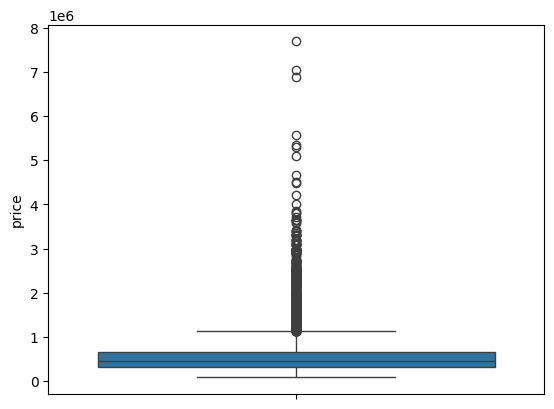

In [9]:
import seaborn as sns
sns.boxplot(df_import['price'])

In [10]:
from scipy import stats
import numpy as np
df_reset_indices = df_import.reset_index(drop=True)
z = np.abs(stats.zscore(df_import['price']))
print(z)
outlier_indices = np.where(z > 2)[0]

print(f"Found {len(outlier_indices)} outliers")
print("Outlier indices:", outlier_indices)
print("Outlier values:", df_import['price'].iloc[outlier_indices].values)
no_outliers = df_reset_indices.drop(outlier_indices)

print("Original DataFrame Shape:", df_import.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

print(f"Median: {df_import['price'].median()}, Mean: {df_import['price'].mean()} \nwithout outlier(s): Median: {no_outliers['price'].median()}, Mean: {no_outliers['price'].mean()}")

[0.86671627 0.00625157 0.98077344 ... 0.37618606 0.38190525 0.58606486]
Found 841 outliers
Outlier indices: [   21    49    69   125   153   216   246   269   270   282   300   312
   313   314   384   419   427   450   484   489   509   518   527   540
   551   556   656   691   722   738   757   779   792   814   946  1030
  1099  1132  1150  1159  1162  1215  1270  1280  1313  1359  1418  1421
  1431  1438  1446  1469  1537  1582  1674  1728  1730  1768  1815  1816
  1833  1846  1892  1942  1943  1985  2021  2038  2044  2083  2110  2123
  2134  2138  2177  2179  2198  2234  2252  2265  2312  2318  2337  2397
  2427  2442  2447  2459  2464  2471  2561  2562  2563  2618  2624  2666
  2779  2788  2792  2816  2834  2843  2856  2862  2897  2972  3007  3018
  3033  3037  3089  3098  3118  3150  3154  3184  3226  3255  3274  3278
  3335  3341  3381  3404  3436  3452  3515  3522  3582  3660  3683  3704
  3731  3744  3757  3765  3773  3809  3817  3857  3865  3867  3902  3910
  3920  3924  39

In [11]:
df_reset_indices.iloc[26]

id               1794500383
bedrooms                3.0
bathrooms              1.75
sqft_living          2450.0
sqft_lot             2691.0
floors                  2.0
waterfront              0.0
view                    0.0
condition                 3
grade                     8
sqft_above           1750.0
sqft_basement         700.0
yr_built               1915
yr_renovated            NaN
zipcode               98119
lat                 47.6386
long                -122.36
sqft_living15        1760.0
sqft_lot15           3573.0
date             2014-06-26
price              937000.0
Name: 26, dtype: object

<Axes: ylabel='price'>

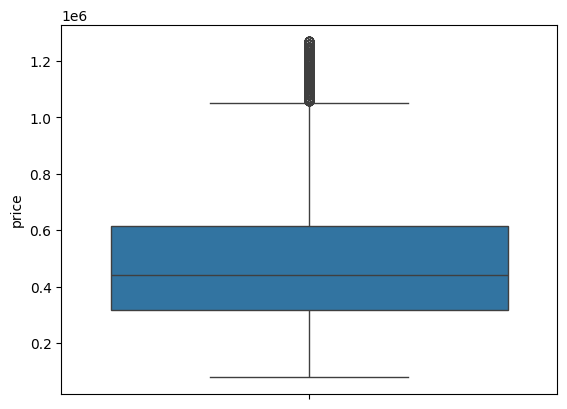

In [12]:
sns.boxplot(no_outliers['price'])

In [13]:
#need to look at outliers before this


average_price = df_import['price'].mean()
q3_price = df_import['price'].quantile(0.75)

more_than_mean = df_outside['price'] > average_price
more_than_q3 = df_outside['price'] > q3_price
more_than_q3.sum()
(~more_than_q3).sum() #calculate how many False

print( f"not more than mean: {(~more_than_mean).sum()}. not in q3: {(~more_than_q3).sum()}")

not more than mean: 1. not in q3: 4


In [14]:
average_price = df_import['price'].mean()
q3_price = df_import['price'].quantile(0.75)

more_than_mean_o = df_olympic_outside['price'] > average_price
more_than_q3_o = df_olympic_outside['price'] > q3_price
more_than_q3_o.sum()
(~more_than_q3_o).sum() #calculate how many False

print( f"not more than mean: {(~more_than_mean_o).sum()}. not in q3: {(~more_than_q3_o).sum()}")

not more than mean: 0. not in q3: 2


In [15]:
not_in_q3 = df_outside[df_outside['price'] < q3_price]
not_in_q3

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond
3314,2821049048,4.0,4.25,2360.0,57514.0,2.0,0.0,0.0,4,8,...,NaN,98003,47.2843,-122.294,2037.0,35733.0,2014-06-03,590000.0,55154.0,49154.0
19445,722059020,6.0,4.50,4520.0,40164.0,2.0,0.0,0.0,3,9,...,20080.0,98031,47.4070,-122.216,2870.0,13068.0,2015-03-18,550000.0,34704.0,28704.0
10264,1420700030,7.0,4.00,2690.0,10880.0,1.0,0.0,0.0,4,8,...,0.0,98033,47.6787,-122.168,1840.0,10836.0,2014-09-22,597157.0,8190.0,2190.0
8608,5379801972,5.0,4.00,1400.0,8580.0,1.0,0.0,0.0,5,7,...,0.0,98188,47.4560,-122.292,1220.0,8832.0,2014-08-18,265000.0,6680.0,680.0


In [16]:
average_price = no_outliers['price'].mean()
q3_price = no_outliers['price'].quantile(0.75)

more_than_mean = df_outside['price'] > average_price
more_than_q3 = df_outside['price'] > q3_price
more_than_q3.sum()
(~more_than_q3).sum() #calculate how many False

print( f"not more than mean: {(~more_than_mean).sum()}. not in q3: {(~more_than_q3).sum()}")
not_in_q3 = df_outside[df_outside['price'] < q3_price]
not_in_q3

not more than mean: 1. not in q3: 4


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond
3314,2821049048,4.0,4.25,2360.0,57514.0,2.0,0.0,0.0,4,8,...,NaN,98003,47.2843,-122.294,2037.0,35733.0,2014-06-03,590000.0,55154.0,49154.0
19445,722059020,6.0,4.50,4520.0,40164.0,2.0,0.0,0.0,3,9,...,20080.0,98031,47.4070,-122.216,2870.0,13068.0,2015-03-18,550000.0,34704.0,28704.0
10264,1420700030,7.0,4.00,2690.0,10880.0,1.0,0.0,0.0,4,8,...,0.0,98033,47.6787,-122.168,1840.0,10836.0,2014-09-22,597157.0,8190.0,2190.0
8608,5379801972,5.0,4.00,1400.0,8580.0,1.0,0.0,0.0,5,7,...,0.0,98188,47.4560,-122.292,1220.0,8832.0,2014-08-18,265000.0,6680.0,680.0


In [17]:
df_possible_houses
#df_possible_olympic_houses


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond
15152,3304700130,4.0,4.00,3860.0,67953.0,2.0,0.0,2.0,4,12,...,0.0,98177,47.7469,-122.378,4410.0,128066.0,2015-01-28,1760000.0,64093.0,58093.0
3314,2821049048,4.0,4.25,2360.0,57514.0,2.0,0.0,0.0,4,8,...,NaN,98003,47.2843,-122.294,2037.0,35733.0,2014-06-03,590000.0,55154.0,49154.0
14542,2303900035,5.0,6.25,8670.0,64033.0,2.0,0.0,4.0,3,13,...,NaN,98177,47.7295,-122.372,4140.0,81021.0,2014-06-11,2890000.0,52813.0,46813.0
3018,3377900195,4.0,5.50,6930.0,45100.0,1.0,0.0,0.0,4,11,...,19910.0,98006,47.5547,-122.144,2560.0,37766.0,2014-09-29,2530000.0,38170.0,32170.0
5961,5249800010,4.0,4.25,6410.0,43838.0,2.5,0.0,2.0,4,12,...,0.0,98144,47.5703,-122.280,2270.0,6630.0,2014-12-03,2730000.0,36628.0,30628.0
19445,722059020,6.0,4.50,4520.0,40164.0,2.0,0.0,0.0,3,9,...,20080.0,98031,47.4070,-122.216,2870.0,13068.0,2015-03-18,550000.0,34704.0,28704.0
4020,9175600025,7.0,6.75,7480.0,41664.0,2.0,0.0,2.0,3,11,...,NaN,98166,47.4643,-122.368,2810.0,33190.0,2014-10-07,800000.0,31784.0,25784.0
8507,3425059141,7.0,4.00,3150.0,34830.0,1.0,0.0,0.0,3,9,...,20050.0,98007,47.6029,-122.147,2390.0,12054.0,2014-05-28,999000.0,31680.0,25680.0
14172,1333300145,3.0,4.00,4200.0,30120.0,2.0,0.0,2.0,4,11,...,0.0,98112,47.6379,-122.311,2760.0,12200.0,2015-03-04,2230000.0,25320.0,19320.0
17665,3585901085,6.0,4.50,3810.0,28176.0,1.0,0.0,4.0,5,10,...,0.0,98177,47.7612,-122.381,3810.0,26400.0,2014-06-04,2010000.0,24366.0,18366.0


In [ ]:
# Plotting house positions
import plotly.express as px

fig = px.scatter_mapbox(df_possible_houses, lat="lat", lon="long", hover_name="id",
    zoom=9,     # adjust zoom level
    height=600  # adjust area of map shown
    )
fig.update_traces(marker=dict(size=15, color="orange"))
fig.update_layout(mapbox_style="open-street-map")

fig.show()
fig.write_html("images/possible_houses_map.html")

C:\Users\Dizzzy\AppData\Local\Temp\ipykernel_15396\273679012.py:4: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df_possible_houses, lat="lat", lon="long", hover_name="id",


# seattle zipcodes

In [19]:
import re
zipcodes_raw = """<list><div id="zipcodes" class="py-3 anchor-scroll"><div class="container"><h2>Seattle, WA has 60 ZIP Codes</h2><hr><div class="table-responsive"><table border="0" cellspacing="0" cellpadding="0" width="100%" class="table table-striped table-hover table-bordered small border rounded-3 overflow-hidden sortableTbl" id="tblZIP"><thead><tr><th nowrap="" class="header headerSortDown">ZIP Code</th><th class="header">Type</th><th axis="num" class="header"><span class="d-none d-md-block">Population</span><span class="d-block d-md-none d-lg-none">Pop</span></th><th class="header"><span class="d-none d-md-block">% of Population</span><span class="d-block d-md-none d-lg-none">% of Pop</span></th><th class="header">Alias Names</th></tr></thead><tbody><tr><td><a href="/zip-code/98101/zip-code-98101.asp" title="ZIP Code 98101">98101</a></td><td>Standard</td><td>16,237</td><td>1.60%</td><td>Times Square</td></tr><tr><td><a href="/zip-code/98102/zip-code-98102.asp" title="ZIP Code 98102">98102</a></td><td>Standard</td><td>25,066</td><td>2.46%</td><td>Broadway, Capitol Hill</td></tr><tr><td><a href="/zip-code/98103/zip-code-98103.asp" title="ZIP Code 98103">98103</a></td><td>Standard</td><td>53,056</td><td>5.21%</td><td>Greenwood, Wallingford</td></tr><tr><td><a href="/zip-code/98104/zip-code-98104.asp" title="ZIP Code 98104">98104</a></td><td>Standard</td><td>16,157</td><td>1.59%</td><td>International, Pioneer Square</td></tr><tr><td><a href="/zip-code/98105/zip-code-98105.asp" title="ZIP Code 98105">98105</a></td><td>Standard</td><td>49,151</td><td>4.83%</td><td>University</td></tr><tr><td><a href="/zip-code/98106/zip-code-98106.asp" title="ZIP Code 98106">98106</a></td><td>Standard</td><td>26,295</td><td>2.58%</td><td>White Center</td></tr><tr><td><a href="/zip-code/98107/zip-code-98107.asp" title="ZIP Code 98107">98107</a></td><td>Standard</td><td>28,557</td><td>2.81%</td><td>Ballard</td></tr><tr><td><a href="/zip-code/98108/zip-code-98108.asp" title="ZIP Code 98108">98108</a></td><td>Standard</td><td>25,009</td><td>2.46%</td><td>Tukwila</td></tr><tr><td><a href="/zip-code/98109/zip-code-98109.asp" title="ZIP Code 98109">98109</a></td><td>Standard</td><td>34,551</td><td>3.40%</td><td>Queen Anne</td></tr><tr><td><a href="/zip-code/98110/zip-code-98110.asp" title="ZIP Code 98110">98110</a></td><td>Standard</td><td>24,825</td><td>2.44%</td><td>Bainbridge Is, Seattle</td></tr><tr><td><a href="/zip-code/98111/zip-code-98111.asp" title="ZIP Code 98111">98111</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98112/zip-code-98112.asp" title="ZIP Code 98112">98112</a></td><td>Standard</td><td>23,152</td><td>2.28%</td><td>Madison Park</td></tr><tr><td><a href="/zip-code/98113/zip-code-98113.asp" title="ZIP Code 98113">98113</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98114/zip-code-98114.asp" title="ZIP Code 98114">98114</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98115/zip-code-98115.asp" title="ZIP Code 98115">98115</a></td><td>Standard</td><td>54,322</td><td>5.34%</td><td>Seattle Naval Support Activi, Wedgwood</td></tr><tr><td><a href="/zip-code/98116/zip-code-98116.asp" title="ZIP Code 98116">98116</a></td><td>Standard</td><td>27,691</td><td>2.72%</td><td>West Seattle</td></tr><tr><td><a href="/zip-code/98117/zip-code-98117.asp" title="ZIP Code 98117">98117</a></td><td>Standard</td><td>35,608</td><td>3.50%</td><td>Crown Hill</td></tr><tr><td><a href="/zip-code/98118/zip-code-98118.asp" title="ZIP Code 98118">98118</a></td><td>Standard</td><td>47,504</td><td>4.67%</td><td>Columbia</td></tr><tr><td><a href="/zip-code/98119/zip-code-98119.asp" title="ZIP Code 98119">98119</a></td><td>Standard</td><td>26,238</td><td>2.58%</td><td>Interbay</td></tr><tr><td><a href="/zip-code/98121/zip-code-98121.asp" title="ZIP Code 98121">98121</a></td><td>Standard</td><td>21,411</td><td>2.10%</td><td></td></tr><tr><td><a href="/zip-code/98122/zip-code-98122.asp" title="ZIP Code 98122">98122</a></td><td>Standard</td><td>41,646</td><td>4.09%</td><td>East Union</td></tr><tr><td><a href="/zip-code/98124/zip-code-98124.asp" title="ZIP Code 98124">98124</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98125/zip-code-98125.asp" title="ZIP Code 98125">98125</a></td><td>Standard</td><td>42,965</td><td>4.22%</td><td>Lake City, Northgate</td></tr><tr><td><a href="/zip-code/98126/zip-code-98126.asp" title="ZIP Code 98126">98126</a></td><td>Standard</td><td>23,727</td><td>2.33%</td><td>Westwood Village</td></tr><tr><td><a href="/zip-code/98127/zip-code-98127.asp" title="ZIP Code 98127">98127</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98129/zip-code-98129.asp" title="ZIP Code 98129">98129</a> <i class="fa-solid fa-building" title="Unique/Business ZIP Code"></i></td><td>Unique</td><td>0</td><td>0.00%</td><td>Reg Lib Handicapped</td></tr><tr><td><a href="/zip-code/98131/zip-code-98131.asp" title="ZIP Code 98131">98131</a></td><td>Standard</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98133/zip-code-98133.asp" title="ZIP Code 98133">98133</a></td><td>Standard</td><td>50,720</td><td>4.99%</td><td>Bitter Lake, Richmond Highlands, Shoreline</td></tr><tr><td><a href="/zip-code/98134/zip-code-98134.asp" title="ZIP Code 98134">98134</a></td><td>Standard</td><td>1,216</td><td>0.12%</td><td></td></tr><tr><td><a href="/zip-code/98136/zip-code-98136.asp" title="ZIP Code 98136">98136</a></td><td>Standard</td><td>16,424</td><td>1.61%</td><td>Westwood</td></tr><tr><td><a href="/zip-code/98138/zip-code-98138.asp" title="ZIP Code 98138">98138</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td>Tukwila</td></tr><tr><td><a href="/zip-code/98139/zip-code-98139.asp" title="ZIP Code 98139">98139</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98141/zip-code-98141.asp" title="ZIP Code 98141">98141</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98144/zip-code-98144.asp" title="ZIP Code 98144">98144</a></td><td>Standard</td><td>32,178</td><td>3.16%</td><td>Beacon Hill</td></tr><tr><td><a href="/zip-code/98145/zip-code-98145.asp" title="ZIP Code 98145">98145</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98146/zip-code-98146.asp" title="ZIP Code 98146">98146</a></td><td>Standard</td><td>28,845</td><td>2.84%</td><td>Burien, Shorewood, White Center</td></tr><tr><td><a href="/zip-code/98148/zip-code-98148.asp" title="ZIP Code 98148">98148</a></td><td>Standard</td><td>11,092</td><td>1.09%</td><td>Burien, Des Moines, Normandy Park, Seatac</td></tr><tr><td><a href="/zip-code/98154/zip-code-98154.asp" title="ZIP Code 98154">98154</a></td><td>Standard</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98155/zip-code-98155.asp" title="ZIP Code 98155">98155</a></td><td>Standard</td><td>35,948</td><td>3.53%</td><td>Forest Park, Lake Forest Park, Lk Forest Park, Lk Forest Pk, North City, Shoreline</td></tr><tr><td><a href="/zip-code/98158/zip-code-98158.asp" title="ZIP Code 98158">98158</a></td><td>Standard</td><td>0</td><td>0.00%</td><td>Seatac, Seatac Airport</td></tr><tr><td><a href="/zip-code/98160/zip-code-98160.asp" title="ZIP Code 98160">98160</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td>Richmond Beach</td></tr><tr><td><a href="/zip-code/98161/zip-code-98161.asp" title="ZIP Code 98161">98161</a></td><td>Standard</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98164/zip-code-98164.asp" title="ZIP Code 98164">98164</a></td><td>Standard</td><td>176</td><td>0.02%</td><td></td></tr><tr><td><a href="/zip-code/98165/zip-code-98165.asp" title="ZIP Code 98165">98165</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98166/zip-code-98166.asp" title="ZIP Code 98166">98166</a></td><td>Standard</td><td>22,152</td><td>2.18%</td><td>Burien, Normandy Park</td></tr><tr><td><a href="/zip-code/98168/zip-code-98168.asp" title="ZIP Code 98168">98168</a></td><td>Standard</td><td>36,389</td><td>3.58%</td><td>Burien, Seatac, Tukwila</td></tr><tr><td><a href="/zip-code/98170/zip-code-98170.asp" title="ZIP Code 98170">98170</a> <i class="fa-solid fa-building" title="Unique/Business ZIP Code"></i></td><td>Unique</td><td>0</td><td>0.00%</td><td>Amazon.com</td></tr><tr><td><a href="/zip-code/98174/zip-code-98174.asp" title="ZIP Code 98174">98174</a></td><td>Standard</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98175/zip-code-98175.asp" title="ZIP Code 98175">98175</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98177/zip-code-98177.asp" title="ZIP Code 98177">98177</a></td><td>Standard</td><td>20,160</td><td>1.98%</td><td>Bitter Lake, Richmond Beach, Shoreline, The Highlands</td></tr><tr><td><a href="/zip-code/98178/zip-code-98178.asp" title="ZIP Code 98178">98178</a></td><td>Standard</td><td>26,122</td><td>2.57%</td><td>Bryn Mawr, Skyway, Tukwila</td></tr><tr><td><a href="/zip-code/98181/zip-code-98181.asp" title="ZIP Code 98181">98181</a> <i class="fa-solid fa-building" title="Unique/Business ZIP Code"></i></td><td>Unique</td><td>0</td><td>0.00%</td><td>Macys</td></tr><tr><td><a href="/zip-code/98185/zip-code-98185.asp" title="ZIP Code 98185">98185</a> <i class="fa-solid fa-building" title="Unique/Business ZIP Code"></i></td><td>Unique</td><td>0</td><td>0.00%</td><td>Safeco Plaza</td></tr><tr><td><a href="/zip-code/98188/zip-code-98188.asp" title="ZIP Code 98188">98188</a></td><td>Standard</td><td>27,851</td><td>2.74%</td><td>Duwamish, Mcmicken Heights, Riverton, Seatac, Tukwila</td></tr><tr><td><a href="/zip-code/98190/zip-code-98190.asp" title="ZIP Code 98190">98190</a> <i class="fa-solid fa-building" title="Unique/Business ZIP Code"></i></td><td>Unique</td><td>0</td><td>0.00%</td><td>Capital One</td></tr><tr><td><a href="/zip-code/98191/zip-code-98191.asp" title="ZIP Code 98191">98191</a> <i class="fa-solid fa-building" title="Unique/Business ZIP Code"></i></td><td>Unique</td><td>0</td><td>0.00%</td><td>Qwest</td></tr><tr><td><a href="/zip-code/98194/zip-code-98194.asp" title="ZIP Code 98194">98194</a> <i class="fa-solid fa-box" title="PO BOX ZIP Code"></i></td><td>P.O. Box</td><td>0</td><td>0.00%</td><td></td></tr><tr><td><a href="/zip-code/98195/zip-code-98195.asp" title="ZIP Code 98195">98195</a> <i class="fa-solid fa-building" title="Unique/Business ZIP Code"></i></td><td>Unique</td><td>3,710</td><td>0.36%</td><td>Univ Of Washington</td></tr><tr><td><a href="/zip-code/98198/zip-code-98198.asp" title="ZIP Code 98198">98198</a></td><td>Standard</td><td>38,727</td><td>3.81%</td><td>Des Moines, Normandy Park, Redondo Beach, Seatac</td></tr><tr><td><a href="/zip-code/98199/zip-code-98199.asp" title="ZIP Code 98199">98199</a></td><td>Standard</td><td>22,549</td><td>2.22%</td><td>Fort Lawton, Magnolia</td></tr></tbody></table></div><ins class="adsbygoogle container" style="display:block" data-ad-client="ca-pub-6449469715038723" data-ad-slot="9841517722" data-ad-format="auto" data-full-width-responsive="true" data-adsbygoogle-status="done"><iframe id="aswift_1" style="height: 1px !important; max-height: 1px !important; max-width: 1px !important; width: 1px !important;"><iframe id="google_ads_frame1"></iframe></iframe></ins></div></div></list>"""
pattern = r'zip-code/(\d{5})/'
zipcodes = re.findall(pattern, zipcodes_raw)
type(zipcodes)
zips = pd.DataFrame(zipcodes, columns= ['zipcode'])
zips

,zipcode
0,98101
1,98102
2,98103
3,98104
4,98105
5,98106
6,98107
7,98108
8,98109
9,98110


In [20]:
type(df_possible_houses['zipcode'])

pandas.core.series.Series

In [21]:
houses_in_seattle = df_possible_houses[df_possible_houses['zipcode'].astype(str).isin(zipcodes)]
houses_in_seattle

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond
15152,3304700130,4.0,4.00,3860.0,67953.0,2.0,0.0,2.0,4,12,...,0.0,98177,47.7469,-122.378,4410.0,128066.0,2015-01-28,1760000.0,64093.0,58093.0
14542,2303900035,5.0,6.25,8670.0,64033.0,2.0,0.0,4.0,3,13,...,NaN,98177,47.7295,-122.372,4140.0,81021.0,2014-06-11,2890000.0,52813.0,46813.0
5961,5249800010,4.0,4.25,6410.0,43838.0,2.5,0.0,2.0,4,12,...,0.0,98144,47.5703,-122.280,2270.0,6630.0,2014-12-03,2730000.0,36628.0,30628.0
4020,9175600025,7.0,6.75,7480.0,41664.0,2.0,0.0,2.0,3,11,...,NaN,98166,47.4643,-122.368,2810.0,33190.0,2014-10-07,800000.0,31784.0,25784.0
14172,1333300145,3.0,4.00,4200.0,30120.0,2.0,0.0,2.0,4,11,...,0.0,98112,47.6379,-122.311,2760.0,12200.0,2015-03-04,2230000.0,25320.0,19320.0
17665,3585901085,6.0,4.50,3810.0,28176.0,1.0,0.0,4.0,5,10,...,0.0,98177,47.7612,-122.381,3810.0,26400.0,2014-06-04,2010000.0,24366.0,18366.0
18314,5317100750,4.0,4.75,4575.0,24085.0,2.5,0.0,2.0,5,10,...,0.0,98112,47.6263,-122.284,3900.0,9687.0,2014-07-11,2920000.0,18840.0,12840.0
18711,239000155,5.0,4.50,3540.0,21217.0,2.0,0.0,0.0,4,8,...,0.0,98188,47.4274,-122.280,1290.0,12040.0,2015-01-05,707000.0,17077.0,11077.0
5844,3585900500,4.0,4.25,4720.0,21000.0,3.0,0.0,4.0,5,11,...,0.0,98177,47.7591,-122.376,3010.0,20000.0,2015-04-02,1530000.0,16280.0,10280.0
7245,6762700020,6.0,8.00,12050.0,27600.0,2.5,0.0,3.0,4,13,...,19870.0,98102,47.6298,-122.323,3940.0,8800.0,2014-10-13,7700000.0,12070.0,6070.0


In [22]:
olympic_houses_in_seattle = df_possible_olympic_houses[df_possible_olympic_houses['zipcode'].astype(str).isin(zipcodes)]
olympic_houses_in_seattle

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond
15152,3304700130,4.0,4.00,3860.0,67953.0,2.0,0.0,2.0,4,12,...,0.0,98177,47.7469,-122.378,4410.0,128066.0,2015-01-28,1760000.0,64093.0,45393.0
14542,2303900035,5.0,6.25,8670.0,64033.0,2.0,0.0,4.0,3,13,...,NaN,98177,47.7295,-122.372,4140.0,81021.0,2014-06-11,2890000.0,52813.0,34113.0
5961,5249800010,4.0,4.25,6410.0,43838.0,2.5,0.0,2.0,4,12,...,0.0,98144,47.5703,-122.280,2270.0,6630.0,2014-12-03,2730000.0,36628.0,17928.0
4020,9175600025,7.0,6.75,7480.0,41664.0,2.0,0.0,2.0,3,11,...,NaN,98166,47.4643,-122.368,2810.0,33190.0,2014-10-07,800000.0,31784.0,13084.0
14172,1333300145,3.0,4.00,4200.0,30120.0,2.0,0.0,2.0,4,11,...,0.0,98112,47.6379,-122.311,2760.0,12200.0,2015-03-04,2230000.0,25320.0,6620.0
17665,3585901085,6.0,4.50,3810.0,28176.0,1.0,0.0,4.0,5,10,...,0.0,98177,47.7612,-122.381,3810.0,26400.0,2014-06-04,2010000.0,24366.0,5666.0
18314,5317100750,4.0,4.75,4575.0,24085.0,2.5,0.0,2.0,5,10,...,0.0,98112,47.6263,-122.284,3900.0,9687.0,2014-07-11,2920000.0,18840.0,140.0


In [23]:
print(df_possible_houses['zipcode'].dtype)
print(type(zipcodes[0]))  # Check first element of your list

int64
<class 'str'>


In [24]:
df_import.bedrooms.unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

In [25]:
from geopy.geocoders import Nominatim
import folium
geolocator = Nominatim(user_agent='houses')
map_center = [df_olympic_outside['long'].mean(),df_olympic_outside['lat'].mean()]
map = folium.Map(location=map_center, zoom_start=10)

In [142]:
range_built_yrs = df_import.groupby('zipcode').agg(range=('yr_built',lambda x:x.max()-x.min()))
range_built_yrs
range_built_yrs.query('range > 10')
#range_built_yrs['range'].mean()
df_import_range = df_import.merge(range_built_yrs, on = 'zipcode',how='left')
df_import_range

#df_import.groupby('zipcode')['yr_built'].max() - df_import.groupby('zipcode')['yr_built'].min()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,range
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,109
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,110
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,97
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,115
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,115
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,106
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,115
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,114


In [27]:
historic_houses_df = df_import
df_import.query('bedrooms == 33')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
15856,2402100895,33.0,1.75,1620.0,6000.0,1.0,0.0,0.0,5,7,...,580.0,1947,0.0,98103,47.6878,-122.331,1330.0,4700.0,2014-06-25,640000.0


# get the  geomaps


# got the addressses

In [246]:
import geopy

geo = Nominatim(user_agent='phillips')
def get_address(row):
    location = geo.reverse((row['lat'], row['long']))
    return location.address if location else None

df_possible_houses['address'] = df_possible_houses.apply(get_address, axis = 1)
#df_possible_houses.columns

In [70]:
df_possible_houses

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,sqft_outside,sqft_outside_left_after_cond,address
15152,3304700130,4.0,4.00,3860.0,67953.0,2.0,0.0,2.0,4,12,...,98177,47.7469,-122.378,4410.0,128066.0,2015-01-28,1760000.0,64093.0,58093.0,"88, Olympic Drive, Spring Beach, The Highlands..."
3314,2821049048,4.0,4.25,2360.0,57514.0,2.0,0.0,0.0,4,8,...,98003,47.2843,-122.294,2037.0,35733.0,2014-06-03,590000.0,55154.0,49154.0,"2860, South 354th Lane, Federal Way, King Coun..."
14542,2303900035,5.0,6.25,8670.0,64033.0,2.0,0.0,4.0,3,13,...,98177,47.7295,-122.372,4140.0,81021.0,2014-06-11,2890000.0,52813.0,46813.0,"1291, Northwest Elford Drive, Broadview, Seatt..."
3018,3377900195,4.0,5.50,6930.0,45100.0,1.0,0.0,0.0,4,11,...,98006,47.5547,-122.144,2560.0,37766.0,2014-09-29,2530000.0,38170.0,32170.0,"5250, 146th Avenue Southeast, Hilltop, Bellevu..."
5961,5249800010,4.0,4.25,6410.0,43838.0,2.5,0.0,2.0,4,12,...,98144,47.5703,-122.280,2270.0,6630.0,2014-12-03,2730000.0,36628.0,30628.0,"3749, Lake Washington Boulevard South, Columbi..."
19445,722059020,6.0,4.50,4520.0,40164.0,2.0,0.0,0.0,3,9,...,98031,47.4070,-122.216,2870.0,13068.0,2015-03-18,550000.0,34704.0,28704.0,"9420, South 218th Street, Kent, King County, W..."
4020,9175600025,7.0,6.75,7480.0,41664.0,2.0,0.0,2.0,3,11,...,98166,47.4643,-122.368,2810.0,33190.0,2014-10-07,800000.0,31784.0,25784.0,"2700, Southwest 156th Street, Seahurst, Burien..."
8507,3425059141,7.0,4.00,3150.0,34830.0,1.0,0.0,0.0,3,9,...,98007,47.6029,-122.147,2390.0,12054.0,2014-05-28,999000.0,31680.0,25680.0,"714, 145th Avenue Southeast, Bellevue, King Co..."
14172,1333300145,3.0,4.00,4200.0,30120.0,2.0,0.0,2.0,4,11,...,98112,47.6379,-122.311,2760.0,12200.0,2015-03-04,2230000.0,25320.0,19320.0,"1579, East Interlaken Boulevard, Montlake, Cap..."
17665,3585901085,6.0,4.50,3810.0,28176.0,1.0,0.0,4.0,5,10,...,98177,47.7612,-122.381,3810.0,26400.0,2014-06-04,2010000.0,24366.0,18366.0,"18309, 17th Place Northwest, Innis Arden, Shor..."


In [82]:
fig= px.choropleth(df_import, color_continuous_scale='Viridis',range_color=(0,12),locations='zipcode',color= 'yr_built')
fig.show()

Text(0, 0.5, 'Max Year')

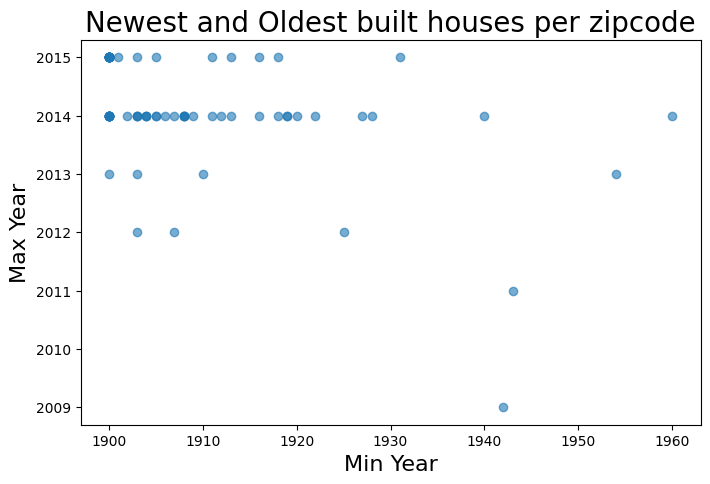

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(
    x=df_import.groupby('zipcode')['yr_built'].min(), 
    y = df_import.groupby('zipcode')['yr_built'].max(), alpha=0.6
    )

ax.set_title(
    label="Newest and Oldest built houses per zipcode",
    fontsize = 20

)

ax.set_xlabel(
    xlabel="Min Year",
    fontsize = 16)

ax.set_ylabel(
    ylabel="Max Year",
    fontsize=16,
   # rotation=0,
    #loc=
)

In [188]:
import geopandas as gpd
king_county_map = gpd.read_file("Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")
king_county_map=king_county_map.rename(columns=str.lower)
king_county_map['zipcode']= king_county_map['zipcode'].astype(str)
df_import['zipcode']= df_import['zipcode'].astype(str)

df_import_range['zipcode']= df_import_range['zipcode'].astype(str)

#map_and_stats = king_county_map.merge(df_import, on = 'zipcode')
map_and_stats = king_county_map.merge(df_import_range, on = 'zipcode')

#range_built_yrs['zipcode']
#print(map_and_stats.geometry.head())




<Axes: >

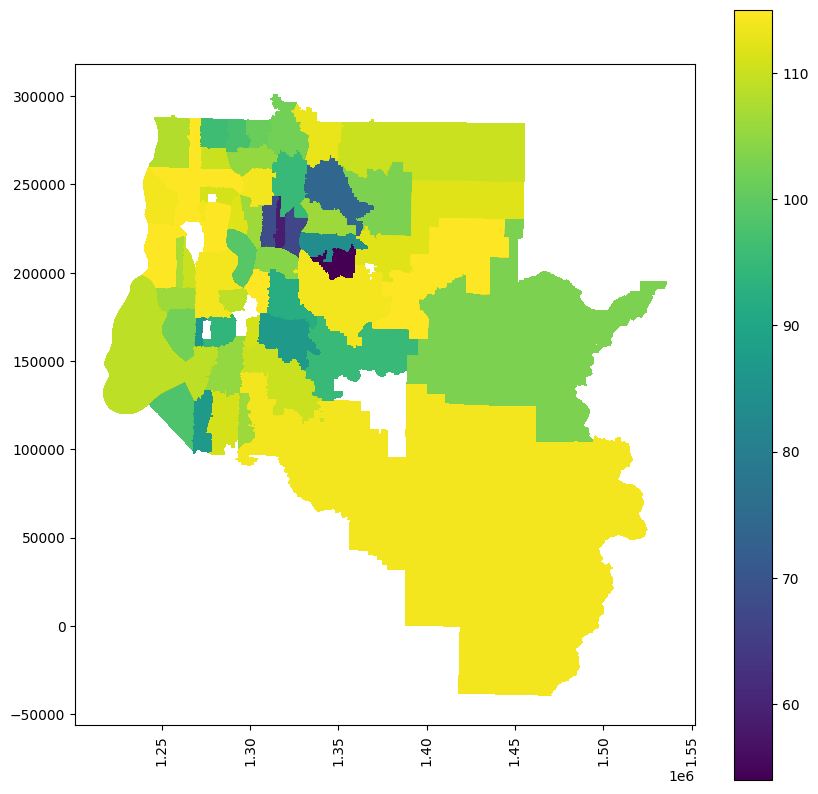

In [189]:
fig, ax = plt.subplots(1, figsize=(10,10))
plt.xticks(rotation=90)
map_and_stats.plot(column='range', cmap='viridis',linewidth=0.4,ax=ax,legend=True)



<Axes: >

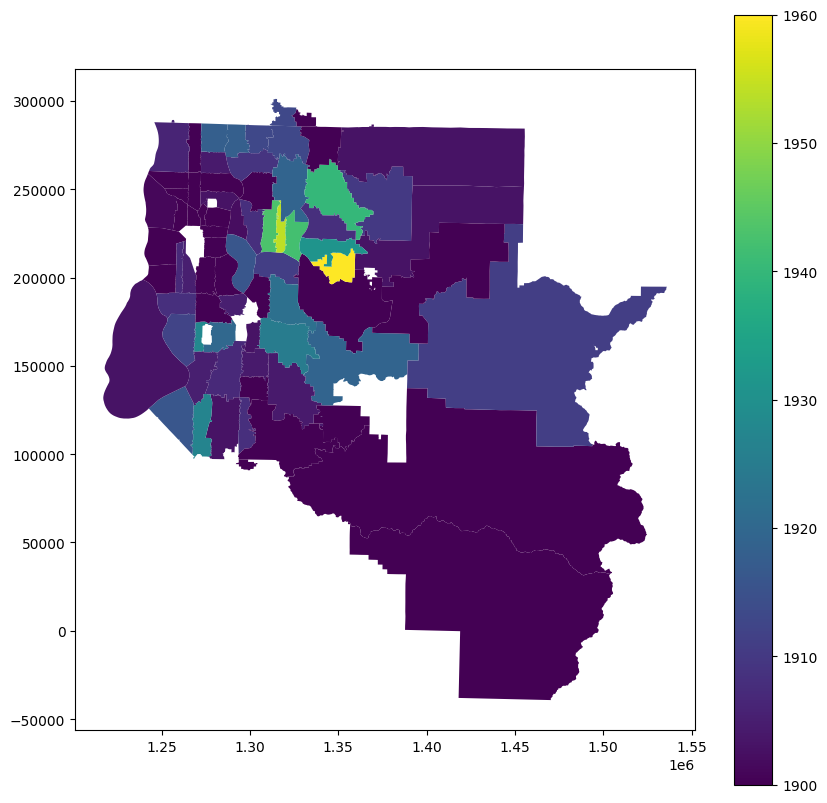

In [186]:
min_years = df_import.groupby('zipcode', as_index=False).agg(min_year=('yr_built','min'))

min_years['zipcode']= min_years['zipcode'].astype(str)
min_years

map_and_stats = king_county_map.merge(min_years, on = 'zipcode')
map_and_stats
fig, ax = plt.subplots(1, figsize=(10,10))

map_and_stats.plot(column='min_year', cmap='viridis',linewidth=0.4,ax=ax,legend=True)



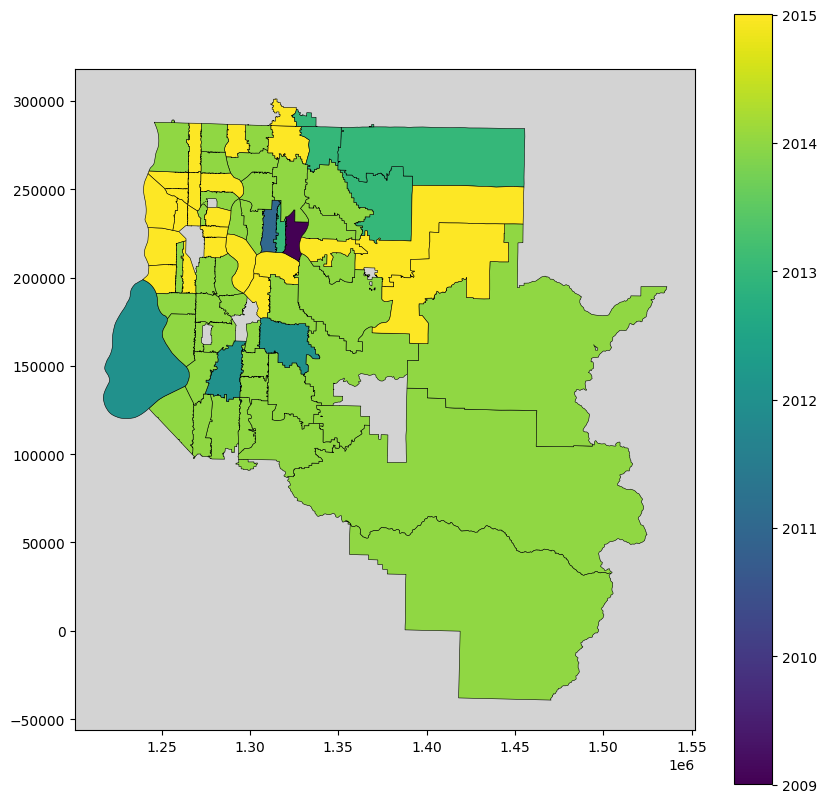

In [221]:
max_years = df_import.groupby('zipcode', as_index=False).agg(max_year=('yr_built','max'))

max_years['zipcode']= min_years['zipcode'].astype(str)
max_years

map_and_stats = king_county_map.merge(max_years, on = 'zipcode')
map_and_stats
fig, ax = plt.subplots(1, figsize=(10,10))

map_and_stats.plot(column='max_year', cmap='viridis',linewidth=0.4,ax=ax,legend=True,edgecolor= 'black')
ax.set_facecolor('lightgrey')

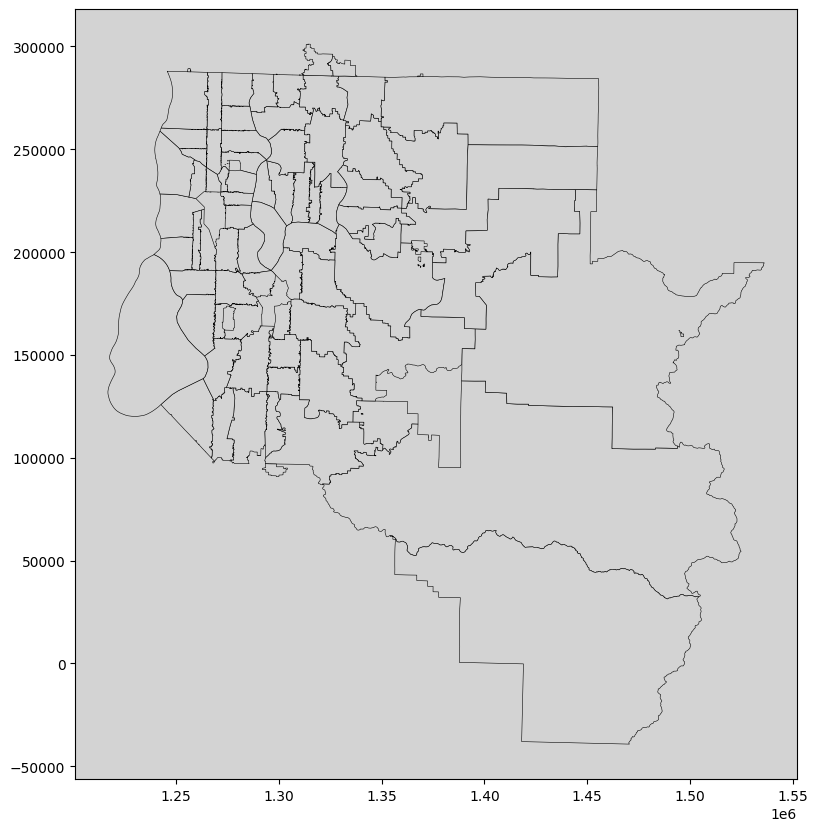

In [222]:
map_and_stats
fig, ax = plt.subplots(1, figsize=(10,10))

map_and_stats.plot(color='lightgrey', linewidth=0.4, edgecolor='black', ax=ax)
#king_county_map.plot(color='lightgrey', linewidth=0.4, edgecolor='black', ax=ax)
ax.set_facecolor('lightgrey') #background
# #king_county_map.plot(ax=ax, color='lightgray', linewidth=0.5)

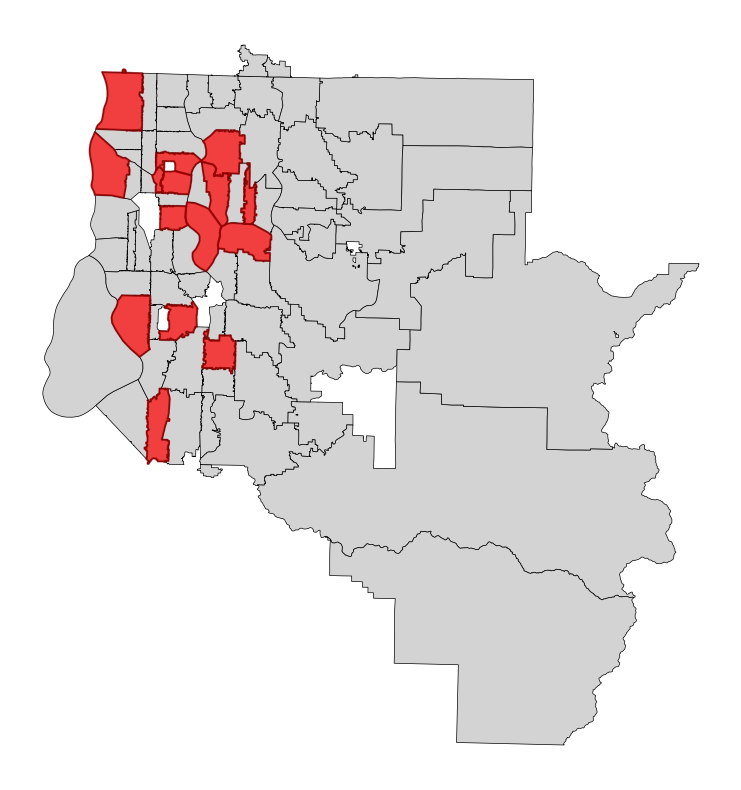

In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# king_county_map = gpd.read_file("Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")
# king_county_map = king_county_map.rename(columns=str.lower)
# king_county_map['zipcode'] = king_county_map['zipcode'].astype(str)

target_zipcodes =  df_possible_houses['zipcode']
target_zipcodes = [str(zipcode) for zipcode in target_zipcodes]


map_and_stats['highlight'] = map_and_stats['zipcode'].isin(target_zipcodes)

fig, ax = plt.subplots(1, figsize=(12, 10))

# Plot all zipcodes in light gray
map_and_stats.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5,legend=True)

# # Overlay highlighted zipcodes in red
highlighted = map_and_stats[map_and_stats['highlight']]
highlighted.plot(ax=ax, color='red', edgecolor='darkred', linewidth=1.5, alpha=0.7)






plt.title('')
plt.axis('off')
plt.show()

In [239]:
highlighted

,objectid,zip,zipcode,county,zip_type,county_nam,preferred_,shape_leng,shape_area,geometry,highlight,max_year
2,3,98003,98003,033,Standard,King County,FEDERAL WAY,123733.574057,3.169426e+08,"POLYGON ((1275933.568 134048.609, 1275932.34 1...",True,2014
3,4,98004,98004,033,Standard,King County,BELLEVUE,99325.949421,2.507454e+08,"POLYGON ((1300626.064 238812.785, 1300625.969 ...",True,2014
5,6,98006,98006,033,Standard,King County,BELLEVUE,94894.755035,3.446854e+08,"POLYGON ((1313280.829 214330.326, 1314614.966 ...",True,2015
6,7,98007,98007,033,Standard,King County,BELLEVUE,113051.219157,1.159669e+08,"POLYGON ((1317627.883 243729.251, 1317626.882 ...",True,2013
22,27,98031,98031,033,Standard,King County,KENT,114217.445762,2.281305e+08,"POLYGON ((1297645.019 162673.524, 1297391.762 ...",True,2014
24,29,98033,98033,033,Standard,King County,KIRKLAND,100570.216011,3.322545e+08,"POLYGON ((1307328.26 259064.8, 1307328.285 259...",True,2014
28,35,98040,98040,033,Standard,King County,MERCER ISLAND,86242.186728,3.556309e+08,"POLYGON ((1298878.647 194227.776, 1296356.182 ...",True,2015
47,64,98102,98102,033,Standard,King County,SEATTLE,37668.912388,4.364570e+07,"POLYGON ((1275615.372 238096.25, 1275560.902 2...",True,2014
49,67,98105,98105,033,Standard,King County,SEATTLE,85254.561375,1.496313e+08,"POLYGON ((1276693.669 249275.018, 1277490.261 ...",True,2014
54,73,98112,98112,033,Standard,King County,SEATTLE,54461.930470,1.408801e+08,"POLYGON ((1282052.741 239616.233, 1283455.488 ...",True,2015


KeyError: 'max_year'

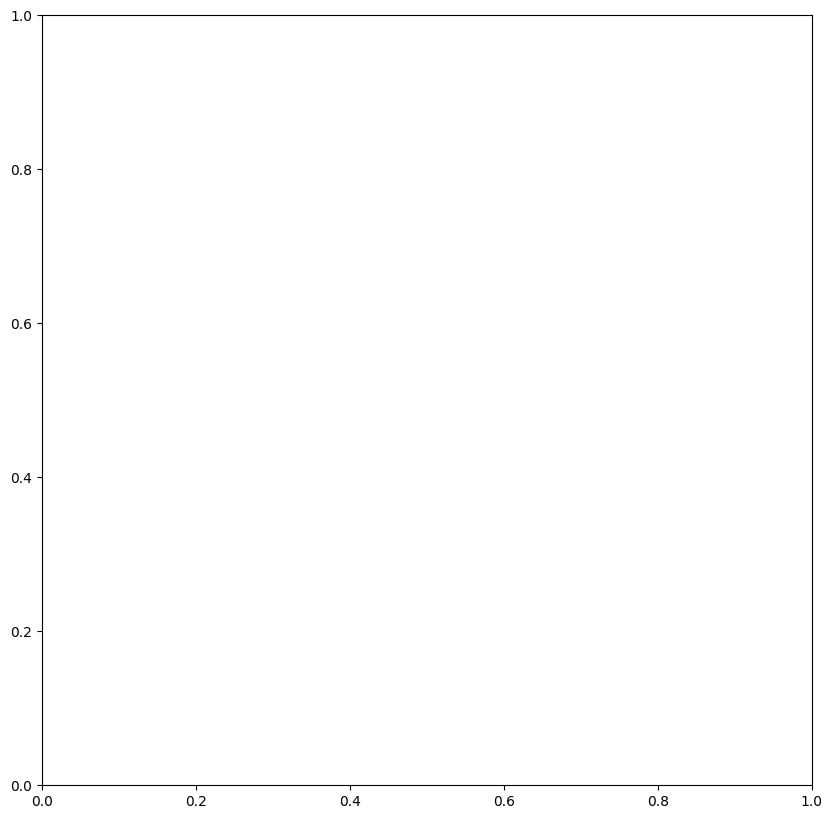

In [ ]:
# possible_houses = df_possible_houses.groupby('zipcode', as_index=False)
# possible_houses
# possible_houses['zipcode']= min_years['zipcode'].astype(str)
df_possible_houses['zipcode']=df_possible_houses['zipcode'].astype(str)

map_and_stats = king_county_map.merge(df_possible_houses, on = 'zipcode')
# map_and_stats
fig, ax = plt.subplots(1, figsize=(10,10))

map_and_stats.plot(column='', cmap='viridis',linewidth=0.4,ax=ax,legend=True)

houses 

In [237]:
df_possible_houses.columns
biggest_lot = df_possible_houses.loc[df_possible_houses['sqft_lot'].idxmax()]
biggest_lot['address']

'88, Olympic Drive, Spring Beach, The Highlands, Shoreline, King County, Washington, 98177, United States'

In [ ]:
def distance(row):
    address1 = (row['lat'],row['long'])
    address2 = 
    try:
        return (geodesic(address1, address2).miles)
    except:
        ValueError: return np.nan

## the address thing for later maybe

In [270]:
df_possible_houses['address'].head()

15152    88, Olympic Drive, Spring Beach, The Highlands...
3314     2860, South 354th Lane, Federal Way, King Coun...
14542    1291, Northwest Elford Drive, Broadview, Seatt...
3018     5250, 146th Avenue Southeast, Hilltop, Bellevu...
5961     3749, Lake Washington Boulevard South, Columbi...
Name: address, dtype: object

In [ ]:
address_df = df_possible_houses['address'].tolist()

column_names= ['street_number','street_name', 'neighbourhood', 'neighbourhood2', 'city', 'county','state', 'zipcode', 'country']
address_df = pd.DataFrame(data = df_possible_houses['address'], columns= column_names)
# neighbourhoods = df_possible_houses.pivot_table(index='address',columns=column_names,values=)
addresses = [addresses.append(row) for row in address_df ]

#address = df_possible_houses['address'].str.split(',',expand=True)
#column_names= ['street_number','street_name', 'neighbourhood', 'neighbourhood2', 'city', 'county','state', 'zipcode', 'country']
 
#address_df = pd.DataFrame(data=address,columns=column_names)
#address_df = pd.DataFrame(data = df_possible_houses['address'], columns= column_names)

#neighbourhoods = df_possible_houses.pivot_table(index='address',columns=column_names,values=address_df)
#addresses = [for row in df_possible_houses addresses.append(row)]

#address_df
address_df

NameError: name 'addresses' is not defined